## USA dataset

This dataset includes national and state-level information from 1990 to 2016. The indicators are listed and categorized below, and all information including the source and units are found in `usa_descriptions.csv` as also displayed in this notebook. The data is found in `usa.csv`

Things to note: 

- Not every field (indicator) has data for every year from 1990-2016. Some have most years while others have only a few. Be sure to consider this when forming your hypotheses. We have provided an example of finding non-null years for various indicators in the examples below.

- It can be difficult to visualize all states at once, and if you add the full United States to your graph it may mess up the axes. Maybe explore a subset of regions or try looking at % change when considering how various indicators changed over time.

- We included an example of looking for a correlation between violent crime and bachelor's degrees below, including a linear regression line and R^2 coefficient. By inspection, the variables look fairly uncorrelated but there is a lot more to look for in this dataset. Trying different types of trend lines and metrics could yield interesting results. 

**Health**

Birth rate

Fertility Rate

Cancer Incidence

Crude Death Rate

Infant Mortality Rate (< 1 year)

Child Mortality Rate (1-4 years)

Chlamydia Incidence

Gonorrhea Incidence

Primary and Secondary Syphillis Incidence

**Education**

18-to-24yr olds who had finished high school

Population 25+ who have Bachelor's or higher degree

Enrollment in Public Elementary and Secondary Schools

Public Elementary and Secondary School Teachers

Pupil/Teacher Ratios in Public Elementary and Secondary Schools

Public High School Graduates

Current Expenditure per Pupil in Average Daily Attendance in Public Elementary and Secondary Schools

**Agriculture**

Crops Production

Land Area

**Demographics**

Persons Obtaining Legal Permanent Resident Status

**Economy**

Total Federal Government Expenditure

Number of Farms

**Labor**

Total Employment

Extended Mass Layoffs

Separations

Average Compensation per Job

**Income and Welfare**

Drop in Welfare Rolls

Personal Income

Per Capita Personal Income

Disposable Personal Income

Per Capita Disposable Personal Income

People in Poverty

**Crime**

Violent Crime

### Data description

In [205]:
pd.set_option('display.max_colwidth',1000) # So it will print all the info in the dataframe
pd.read_csv('usa_descriptions.csv')

,Indicator,Indicator Name,Indicator - Note,Indicator - Source,Indicator - unit
0,AAC,Persons Obtaining Legal Permanent Resident Status,Legal permanent residents (LPRs) are persons who have been granted lawful permanent residence in the United States. They are also known as “green card” recipients,U. S. Department of Homeland Security,Number of persons
1,AAD,Total Federal Government Expenditure,"Include federal expenditures or obligation for the grants, salaries and wages, procurement contracts, direct payments for individuals, including retirement and disability and other direct payments. Total expenditure does not include data on contingent liabilities (loans and insurance)","U. S. Census Bureau, Consolidated Federal Funds Report (CFFR)",Millions of dollars
2,AAE,Number of Farms,"A farm is any establishment from which $1,000 or more of agricultural products were sold or would normally be sold during the year. Number of farms and land in farms were revised for 2007 at the U.S. and State level based on the Census of Agriculture",United States Department of Agruculture (USDA),Number
3,AAF,Total Employment,"The BEA employment series for states and local areas comprises estimates of the number of jobs, full-time plus part-time, by place of work. Full-time and part-time jobs are counted at equal weight. Employees, sole proprietors, and active partners are included, but unpaid family workers and volunteers are not included.",U. S. Bureau of Economic Analysis (BEA),Thousands of Jobs
4,AAH,Extended Mass Layoff Events,"Total private nonfarm. Extended mass layoff is an event where 50 or more workers filed initial claims for unemployment insurance benefits from a private nonfarm employer during a consecutive 5-week period, with at least 50 workers separated for more than 30 days. In States with trigger levels of fewer than 50 initial claimants, employers must confirm that 50 or more people were laid off for more than 30 days in order for events to be classified as extended mass layoffs.",U. S. Bureau of Labor Statistics (BLS),Number of Events
5,AAI,Separations,Separations indicate the number of employees laid off in the extended mass layoff events. Total private nonfarm.,U. S. Bureau of Labor Statistics (BLS),Number
6,AAQ,Average Compensation per Job,Average compensation per job is compensation of employees divided by total full-time and part-time wage and salary employment,U. S. Bureau of Economic Analysis (BEA),dollars
7,AAG,Drop in Welfare Rolls,NaN,NaN,Number of families on welfare
8,AAK,Personal Income,"The personal income of an area is defined as the income that is received by, or on behalf of, all the individuals who live in the area; therefore, the estimates of personal income are presented by the place of residence of the income recipients. Personal income consists of the income that is received by persons from participation in production, from government and business transfer payments, and from government interest (which is treated like a transfer payment). It is calculated as the sum of wage and salary disbursements, other labor income, proprietors' income with inventory valuation and capital consumption adjustments, rental income of persons with capital consumption adjustment, personal dividend income, personal interest income, and transfer payments to persons, less personal contributions for social insurance.",U. S. Bureau of Economic Analysis (BEA),Millions of dollars
9,AAL,Per Capita Personal Income,Calculated as the total personal income of the residents of an area divided by the population of the area. Per capita personal income is often used as an indicator of consumers' purchasing power and of the economic well-being of the residents of an area.,U. S. Bureau of Economic Analysis (BEA),dollars


### Some useful imports

Pandas for manipulating the data efficiently, matplotlib for visualization, numpy for some numeric methods. The `%matplotlib inline` lets plots show up in a notebook. Some more interesting libraries are `seaborn` for visualization and `sklearn` for various statistical methods.

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [206]:
df = pd.read_csv('usa.csv')

`head` the data frame to show the first five rows. You can provide an argument to head(n) to change the number. As we can see, the data is organized in such a way where the state (or U.S. aggregate) is a value under `Region Name` and you can then further index by a specific indicator or indicator name. The values for various years are columns in the row. 

In [207]:
df.head()

,Region Name,Indicator,Indicator Name,Indicator - Note,Indicator - Source,Indicator - unit,Units,1990,1991,1992,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,United States,AAC,Persons Obtaining Legal Permanent Resident Status,Legal permanent residents (LPRs) are persons who have been granted lawful permanent residence in the United States. They are also known as “green card” recipients,U. S. Department of Homeland Security,Number of persons,Number of persons,NaN,NaN,NaN,...,1052415.0,1107126.0,1130818.0,1042625.0,1062040.0,1031631.0,990553.0,1016518.0,1051031.0,NaN
1,United States,AAD,Total Federal Government Expenditure,"Include federal expenditures or obligation for the grants, salaries and wages, procurement contracts, direct payments for individuals, including retirement and disability and other direct payments. Total expenditure does not include data on contingent liabilities (loans and insurance)","U. S. Census Bureau, Consolidated Federal Funds Report (CFFR)",Millions of dollars,Millions of dollars,NaN,NaN,NaN,...,2556200.0,2792600.0,3238400.0,3276400.0,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,AAE,Number of Farms,"A farm is any establishment from which $1,000 or more of agricultural products were sold or would normally be sold during the year. Number of farms and land in farms were revised for 2007 at the U.S. and State level based on the Census of Agriculture",United States Department of Agruculture (USDA),Number,Number,NaN,NaN,NaN,...,2204950.0,2184500.0,2169660.0,2149520.0,2131240.0,2109810.0,2102010.0,2085000.0,2068000.0,2060000.0
3,United States,AAF,Total Employment,"The BEA employment series for states and local areas comprises estimates of the number of jobs, full-time plus part-time, by place of work. Full-time and part-time jobs are counted at equal weight. Employees, sole proprietors, and active partners are included, but unpaid family workers and volunteers are not included.",U. S. Bureau of Economic Analysis (BEA),Thousands of Jobs,Thousands of Jobs,138330900.0,137612800.0,138166100.0,...,179885700.0,179639900.0,174233700.0,173034700.0,176278700.0,179081700.0,182408100.0,186168100.0,190195400.0,NaN
4,United States,AAH,Extended Mass Layoff Events,"Total private nonfarm. Extended mass layoff is an event where 50 or more workers filed initial claims for unemployment insurance benefits from a private nonfarm employer during a consecutive 5-week period, with at least 50 workers separated for more than 30 days. In States with trigger levels of fewer than 50 initial claimants, employers must confirm that 50 or more people were laid off for more than 30 days in order for events to be classified as extended mass layoffs.",U. S. Bureau of Labor Statistics (BLS),Number of Events,Number of Events,NaN,NaN,NaN,...,5363.0,8259.0,11824.0,7247.0,6596.0,6500.0,NaN,NaN,NaN,NaN


Display all unique indicators

In [208]:
list(set(df['Indicator Name']))

['Birth Rate',
 "Population 25 Years Old and Over Who Have Bachelor's or Higher Degree",
 'Separations',
 'Total Federal Government Expenditure',
 'Violent Crime',
 'Land Area',
 'Extended Mass Layoff Events',
 'Drop in Welfare Rolls',
 'Primary and Secondary Syphilis Incidence',
 'Current Expenditure per Pupil in Average Daily Attendance in Public Elementary and Secondary Schools',
 'Fertility Rate',
 'Number of Farms',
 'Pupil/Teacher Ratios in Public Elementary and Secondary Schools',
 'Gonorrhea Incidence',
 'Persons Obtaining Legal Permanent Resident Status',
 'Crude Death Rate',
 'Public Elementary and Secondary Teachers',
 'Per Capita Disposable Personal Income',
 'Per Capita Personal Income',
 'Enrollment in Public Elementary and Secondary Schools',
 'People in Poverty',
 'Chlamydia Incidence',
 'Public High School Graduates',
 'Cancer Incidence',
 '18- to 24-Year-Olds Who Were High School Completers',
 'Disposable Personal Income',
 'Total Employment',
 'Infant Mortality Rate 

### Let's investigate average compensation per job

The goal of this example is to visualize the change in average compensation per job for a few states.

In [210]:
avgcomp = df[df['Indicator Name'] == 'Average Compensation per Job']
avgcomp.head()

,Region Name,Indicator,Indicator Name,Indicator - Note,Indicator - Source,Indicator - unit,Units,1990,1991,1992,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
6,United States,AAQ,Average Compensation per Job,Average compensation per job is compensation of employees divided by total full-time and part-time wage and salary employment,U. S. Bureau of Economic Analysis (BEA),dollars,dollars,28544.0,29841.0,31633.0,...,54973.0,56429.0,56814.0,58634.0,60188.0,61509.0,62159.0,63801.0,65569.0,NaN
39,Alabama,AAQ,Average Compensation per Job,Average compensation per job is compensation of employees divided by total full-time and part-time wage and salary employment,U. S. Bureau of Economic Analysis (BEA),dollars,dollars,24658.0,25786.0,27221.0,...,45498.0,47055.0,48402.0,49833.0,50917.0,51251.0,51524.0,52991.0,53958.0,NaN
72,Alaska,AAQ,Average Compensation per Job,Average compensation per job is compensation of employees divided by total full-time and part-time wage and salary employment,U. S. Bureau of Economic Analysis (BEA),dollars,dollars,36137.0,37559.0,39146.0,...,59888.0,62011.0,64178.0,65918.0,68449.0,70728.0,71993.0,74440.0,76275.0,NaN
105,Arizona,AAQ,Average Compensation per Job,Average compensation per job is compensation of employees divided by total full-time and part-time wage and salary employment,U. S. Bureau of Economic Analysis (BEA),dollars,dollars,25967.0,27220.0,28600.0,...,51283.0,53006.0,53543.0,54499.0,56004.0,56984.0,57426.0,58575.0,59466.0,NaN
138,Arkansas,AAQ,Average Compensation per Job,Average compensation per job is compensation of employees divided by total full-time and part-time wage and salary employment,U. S. Bureau of Economic Analysis (BEA),dollars,dollars,22059.0,23153.0,24617.0,...,42465.0,43378.0,44295.0,45414.0,46515.0,48189.0,49018.0,50105.0,50865.0,NaN


Now we want to just take the columns we care about for this analysis; let's take **2006-2010**

In [212]:
columns = ['Region Name', '2006', '2007', '2008', '2009', '2010']
avg_subset = avgcomp[columns]
avg_subset.head()

,Region Name,2006,2007,2008,2009,2010
6,United States,52789.0,54973.0,56429.0,56814.0,58634.0
39,Alabama,44028.0,45498.0,47055.0,48402.0,49833.0
72,Alaska,57149.0,59888.0,62011.0,64178.0,65918.0
105,Arizona,49038.0,51283.0,53006.0,53543.0,54499.0
138,Arkansas,40557.0,42465.0,43378.0,44295.0,45414.0


Now let's take the states we care about. Let's arbitrarily choose **Texas, California, Wyoming, and West Virginia**. 

In [213]:
states = ['Texas', 'California', 'Wyoming', 'West Virginia']
avg_states = avg_subset[avg_subset['Region Name'].isin(states)]
avg_states

,Region Name,2006,2007,2008,2009,2010
171,California,61086.0,63593.0,65090.0,65488.0,68034.0
1455,Texas,50967.0,53181.0,54468.0,54694.0,56616.0
1619,West Virginia,41806.0,42744.0,44867.0,45931.0,46872.0
1685,Wyoming,46854.0,50059.0,52927.0,51966.0,53810.0


Finally, let's plot the data and see if we see anything interesting. The code below iterates over each row in the above dataframe, and plots the x values (years) over y values (avg comp)

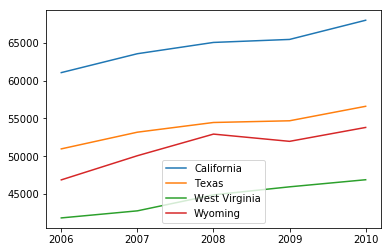

In [214]:
for _idx, row in avg_states.iterrows():
    x = [2006, 2007, 2008, 2009, 2010]
    y = [row['2006'], row['2007'], row['2008'], row['2009'], row['2010']]
    plt.plot(x, y, label=row['Region Name'])
    plt.legend()
    plt.xticks(x)

**Let's try visualizing over more years.** In the process, we'll try and programatically plot each year instead of having to type out each year you want. Furthermore, we'll now have a way to check which years this metric is defined for. 

The below function sums up each columns null values. As we can see, this metric is defined for 1990-2015

In [216]:
avgcomp.isnull().sum()

Region Name            0
Indicator              0
Indicator Name         0
Indicator - Note       0
Indicator - Source     0
Indicator - unit       0
Units                  0
1990                   0
1991                   0
1992                   0
1993                   0
1994                   0
1995                   0
1996                   0
1997                   0
1998                   0
1999                   0
2000                   0
2001                   0
2002                   0
2003                   0
2004                   0
2005                   0
2006                   0
2007                   0
2008                   0
2009                   0
2010                   0
2011                   0
2012                   0
2013                   0
2014                   0
2015                   0
2016                  52
dtype: int64

Let's take **1995-2007.** This code appends the string-value of each one (since our column names are strings) to our row of columns.

In [220]:
columns = ['Region Name']
for i in range(1995, 2008):
    columns.append(str(i))
columns

['Region Name',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007']

By passing in `columns` to `avgcomp` we can retreive the part of the dataset including the columns we care about.

In [221]:
avg_subset = avgcomp[columns]
avg_subset.head()

,Region Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
6,United States,33999.0,35125.0,36588.0,38442.0,40118.0,42526.0,43978.0,44991.0,46713.0,48912.0,50722.0,52789.0,54973.0
39,Alabama,29477.0,30276.0,31242.0,32286.0,33571.0,34858.0,36305.0,37648.0,39270.0,40872.0,42500.0,44028.0,45498.0
72,Alaska,40610.0,41286.0,42139.0,43086.0,43857.0,45271.0,47518.0,49157.0,51120.0,53001.0,55458.0,57149.0,59888.0
105,Arizona,31021.0,32237.0,33614.0,35497.0,36870.0,39213.0,40562.0,41548.0,42801.0,44677.0,46543.0,49038.0,51283.0
138,Arkansas,26494.0,27247.0,28317.0,29795.0,30861.0,32099.0,33386.0,34568.0,36147.0,37869.0,39288.0,40557.0,42465.0


Now let's filter out our states again.

In [222]:
states = ['Texas', 'California', 'Wyoming', 'West Virginia']
avg_states = avg_subset[avg_subset['Region Name'].isin(states)]
avg_states

,Region Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
171,California,37455.0,38521.0,40429.0,42415.0,44934.0,49173.0,50153.0,50824.0,53180.0,56443.0,58649.0,61086.0,63593.0
1455,Texas,32105.0,33397.0,35070.0,37170.0,38815.0,41211.0,42706.0,43217.0,44640.0,46426.0,48396.0,50967.0,53181.0
1619,West Virginia,29215.0,29881.0,30549.0,31287.0,32266.0,33671.0,35003.0,35805.0,37104.0,38496.0,39825.0,41806.0,42744.0
1685,Wyoming,27835.0,28451.0,29624.0,30560.0,31767.0,33189.0,35005.0,36339.0,38000.0,39848.0,42087.0,46854.0,50059.0


Now, we'll populate x with a list of years. The way we do this is use the `range` object, then convert it to a list. Note that the second argument to `range` isn't included `[y1, y2)`. Then for our years, we take all the columns names excluding the first one which is 'Region Name' with `columns[1:]` indicating columns 1 (0-indexed) to the end. Finally, we plot it.

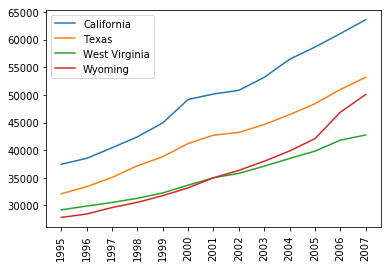

In [115]:
for _idx, row in employ_states.iterrows():
    x = list(range(1995, 2008))
    years = columns[1:]
    y = [row[col] for col in years]
    plt.plot(x, y, label=row['Region Name'])
    plt.legend()
    plt.xticks(x, rotation='vertical')

Slightly interesting: Wyoming passed West Virginia around 2001. You can do better than this though! 

### Next example: looking for correlations!

In this example, we'll explore the relationship between the two indicators: *Population 25 Years Old and Over who Have Bachelor's Or Higher Degree* and *Violent Crime*. We'll also perform and plot a linear regression on the data and check the R^2 coefficient.

First, we'll filter out our columns. Next, we'll see for which year(s) both values are defined. Because the Bachelor's degree column is only given to us for a few years in this dataset, we'll need to find one of those. As seen in the results, 2000 and 2009 are two examples of years where none of the values are Null indicating that we have data for both fields for those years.

In [167]:
cols = ['Population 25 Years Old and Over Who Have Bachelor\'s or Higher Degree', 'Violent Crime']
newdf = df[df['Indicator Name'].isin(cols)]
newdf.isnull().sum()

Region Name             0
Indicator               0
Indicator Name          0
Indicator - Note       52
Indicator - Source      0
Indicator - unit        0
Units                   0
1990                   52
1991                   52
1992                   52
1993                   52
1994                   52
1995                   52
1996                   52
1997                   52
1998                   52
1999                   52
2000                    0
2001                   52
2002                   52
2003                   52
2004                   52
2005                   52
2006                   52
2007                   52
2008                   52
2009                    0
2010                   52
2011                    0
2012                    0
2013                    0
2014                   52
2015                  104
2016                  104
dtype: int64

Filter out the two years we care about, as well as the region and indicator of course.

In [223]:
newcols = ['Region Name', 'Indicator Name', '2000', '2009']
newdf = newdf[newcols]

In [225]:
newdf.head()

,Region Name,Indicator Name,2000,2009
13,United States,Violent Crime,506.5,431.9000
24,United States,Population 25 Years Old and Over Who Have Bachelor's or Higher Degree,24.4,28.0223
46,Alabama,Violent Crime,486.2,450.1000
57,Alabama,Population 25 Years Old and Over Who Have Bachelor's or Higher Degree,19.0,22.0040
79,Alaska,Violent Crime,566.9,633.4000


Now, we have **two entries** per region: one for violent crime and one for degrees. What we want to do is get a list of violent crime rates for each region in 2000, and another list of the population of degrees for each region in 2000. We'll do that below. Note that we cast it to a `list` to make it a little easier when plotting.

In [174]:
crime2000 = newdf[newdf['Indicator Name'] == 'Violent Crime']['2000']
crime2000 = list(crime2000)
bachelor2000 = newdf[newdf['Indicator Name'] == 'Population 25 Years Old and Over Who Have Bachelor\'s or Higher Degree']['2000']
bachelor2000 = list(bachelor2000)

Now, using `matplotlib` we'll **plot** the two variables. 

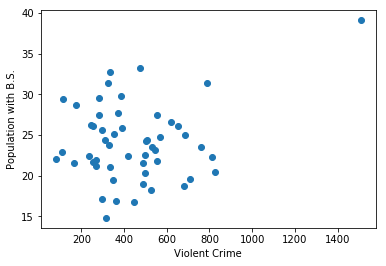

In [176]:
plt.scatter(crime2000, bachelor2000)
plt.xlabel('Violent Crime')
plt.ylabel('Population with B.S.')

Doesn't look like much of a trend-- let's try 2009.

Same code and results for **2009**

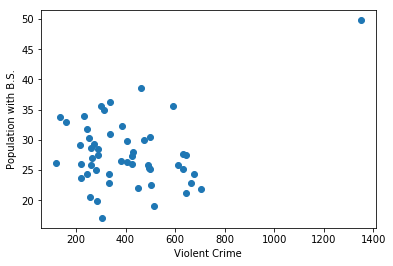

In [178]:
crime2009 = newdf[newdf['Indicator Name'] == 'Violent Crime']['2009']
crime2009 = list(crime2009)
bachelor2009 = newdf[newdf['Indicator Name'] == 'Population 25 Years Old and Over Who Have Bachelor\'s or Higher Degree']['2009']
bachelor2009 = list(bachelor2009)
plt.scatter(crime2009, bachelor2009)
plt.xlabel('Violent Crime')
plt.ylabel('Population with B.S.')

### Linear Regression

For the sake of the example let's try fitting a linear regression to this data. We know it won't be interesting but let's just do it anyway.

In [226]:
from sklearn.linear_model import LinearRegression as lr

We create the model as `lr()` and fit our x and y variables. Next, we can score the model with the predicted values of y vs the actual values. The score is expectedly awful.

In [227]:
model = lr()
x = pd.DataFrame(crime2009)
y = pd.DataFrame(bachelor2009)
model.fit(x, y)
print("R-squared: ", model.score(x, y))

R-squared:  0.0470245157439


Let's **plot** both the line and data points.

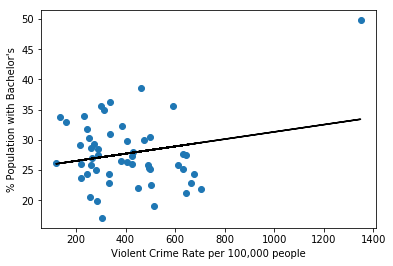

In [203]:
preds = model.predict(x)
plt.scatter(x, y)
plt.plot(x, preds, color='black')
plt.xlabel('Violent Crime Rate per 100,000 people')
plt.ylabel('% Population with Bachelor\'s')